In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
!gdown --id '17PkQ9H-3MUByfem-XB-dJ15iMC2rP6pG' --output level-6.csv

Downloading...
From: https://drive.google.com/uc?id=17PkQ9H-3MUByfem-XB-dJ15iMC2rP6pG
To: /content/level-6.csv
3.25MB [00:00, 104MB/s]


In [5]:
train = pd.read_csv("level-6.csv")
train.head()

,index,Archaea;Aenigmarchaeota;Candidatus.Aenigmarchaeum;;__;__,Archaea;Bacteria.Outgroup;;__;__;__,Archaea;Diapherotrites;Diapherotrites.Incertae.Sedis.AR10;;__;__,Archaea;Euryarchaeota;Halobacteria;Haloferacales;Haloferacaceae;Halorubrum,Archaea;Euryarchaeota;Methanobacteria;Methanobacteriales;Methanobacteriaceae;Methanobrevibacter,Archaea;Euryarchaeota;Methanomicrobia;Methanomicrobiales;Methanospirillaceae;Methanospirillum,Archaea;Euryarchaeota;Methanomicrobia;Methanosarcinales;Methanosarcinaceae;Methanococcoides,Archaea;Euryarchaeota;Methanomicrobia;Methanosarcinales;Methanosarcinaceae;Methanosarcina,Archaea;Euryarchaeota;Methanomicrobia;Methanosarcinales;Methanosarcinaceae;__,Archaea;Euryarchaeota;Methanomicrobia;Methanosarcinales;__;__,Archaea;Euryarchaeota;__;__;__;__,Archaea;Thermoplasmatota;Thermoplasmata;Marine_Group_II;metagenome;,Archaea;Thermoplasmatota;Thermoplasmata;Marine_Group_II;uncultured_bacterium;,Archaea;__;__;__;__;__,Bacteria;AD3;PAC000071;PAC001878;PAC001878;PAC001878,Bacteria;AF234118;EU132452;EU132452;EU132452;HM186358,Bacteria;Abditibacteriota;Abditibacteria;Abditibacteriales;Abditibacteriaceae;Abditibacterium,Bacteria;Acidobacteria;Acidobacteria_Gp6;Gp6;;__,Bacteria;Acidobacteria;Acidobacteriia;Acidobacteriales;Acidobacteriaceae;PAC002018,Bacteria;Acidobacteria;Blastocatellia;Blastocatellales;Blastocatellaceae;Stenotrophobacter,Bacteria;Acidobacteria;Blastocatellia;Blastocatellales;PAC000004;PAC001850,Bacteria;Acidobacteria;Blastocatellia;Blastocatellales;PAC000004;PAC002591,Bacteria;Acidobacteria;CP011806;CP011806;CP011806;CP011806,Bacteria;Acidobacteria;PAC001813;PAC001813;PAC001813;PAC001813,Bacteria;Acidobacteria;PAC001852;PAC001852;PAC001852;PAC001852,Bacteria;Acidobacteria;PAC002261;PAC002261;PAC002261;PAC002261,Bacteria;Acidobacteria;Solibacteres;PAC000121;HM187196;HM187196,Bacteria;Acidobacteria;Solibacteres;PAC000121;PAC000121;PAC000030,Bacteria;Acidobacteria;Solibacteres;PAC000121;PAC000121;PAC000046,Bacteria;Acidobacteria;Solibacteres;Solibacterales;Bryobacteraceae;PAC002019,Bacteria;Acidobacteria;Solibacteres;Solibacterales;Solibacteraceae;Solibacter,Bacteria;Acidobacteria;Solibacteres;Solibacterales;__;__,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;PAC002281;PAC002281,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;DQ787713,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;DQ829632,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;GU187031,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;PAC001869,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;PAC001874,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;Vicinamibacter,...,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Opitutales;Puniceicoccaceae;uncultured,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;ADurb.Bin063-1,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;DEV008,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;DEV114,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;Ellin516,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;Ellin517,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;__,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;uncultured,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;uncultured_bacterium,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;uncultured_subdivision_,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Akkermansiaceae;Akkermansia,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Rubritaleaceae;Luteolibacter,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Verrucomicrobiaceae;Brevifollis,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Verrucomicrobiaceae;Prosthecobacter,Bacteria;Verrucomicrobiota;

In [6]:
# shortrun = train[train['Merged'] < 920].index
# train = train.drop(shortrun,axis=0)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Columns: 2747 entries, index to Cancer
dtypes: float64(2744), int64(1), object(2)
memory usage: 9.6+ MB


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Columns: 2747 entries, index to Cancer
dtypes: float64(2744), int64(1), object(2)
memory usage: 9.6+ MB


In [8]:
CAT_COL = ["index", "Cancer"]

NUM_COL=[]
for i in range(len(train.columns)):
  NUM_COL.append(train.columns[i])
NUM_COL.remove('index')
NUM_COL.remove('Cancer')

cat_col = []
num_col = []
for col in train:
  if col in CAT_COL:
    cat_col.append(col)
  elif col in NUM_COL:
    num_col.append(col)
for col in cat_col:
  train[col] = train[col].astype(str)

df_cat = train.loc[:,cat_col] # take all the categorical columns
df_cat = pd.get_dummies(df_cat) # one hot encoding

df_num = train.loc[:,num_col] # take all the numerical columns
df_final = pd.concat([df_cat, df_num], axis=1) # concat categorical/numerical data

In [9]:
df_final.head()

,index_SRR6477643,index_SRR6477644,index_SRR6477645,index_SRR6477646,index_SRR6477647,index_SRR6477648,index_SRR6477651,index_SRR6477652,index_SRR6477653,index_SRR6477654,index_SRR6477655,index_SRR6477656,index_SRR6477657,index_SRR6477658,index_SRR6477659,index_SRR6477660,index_SRR6477661,index_SRR6477662,index_SRR6477663,index_SRR6477669,index_SRR6477671,index_SRR6477672,index_SRR6477673,index_SRR6477674,index_SRR6477675,index_SRR6477676,index_SRR6477677,index_SRR6477678,index_SRR6477679,index_SRR6477680,index_SRR6477681,index_SRR6477682,index_SRR6477683,index_SRR6477684,index_SRR6477685,index_SRR6477686,index_SRR6477687,index_SRR6477688,index_SRR6477689,index_SRR6477690,...,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Opitutales;Opitutaceae;__,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Opitutales;Puniceicoccaceae;uncultured,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;ADurb.Bin063-1,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;DEV008,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;DEV114,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;Ellin516,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;Ellin517,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;__,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;uncultured,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;uncultured_bacterium,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;uncultured_subdivision_,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Akkermansiaceae;Akkermansia,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Rubritaleaceae;Luteolibacter,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Verrucomicrobiaceae;Brevifollis,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Verrucomicrobiaceae;Prosthecobacter,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Verrucomicrobiaceae;Roseimicrobium,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Verrucomicrobiaceae;Verrucomicrobium,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Verrucomicrobiaceae;uncultured,Bacteria;WOR-1;candidate_division_WOR-1;;__;__,Bacteria;WOR-1;metagenome;;__;__,Bacteria;WPS-2;;__;__;__,Bacteria;WPS-2;__;__;__;__,Bacteria;WPS-2;anaerobic_digester_metagenome;;__;__,Bacteria;WPS-2;bioreactor_sludge_metagenome;;__;__,Bacteria;WPS-2;hydrothermal_vent_metagenome;;__;__,Bacteria;WPS-2;metagenome;;__;__,Bacteria;WPS-2;uncultured_Alphaproteobacteria_bacterium;;__;__,Bacteria;WPS-2;uncultured_Bacillales_bacterium;;__;__,Bacteria;WPS-2;uncultured_soil_bacterium;;__;__,Bacteria;WS2;__;__;__;__,Bacteria;WS2;uncultured_Firmicutes_bacterium;;__;__,Bacteria;WS2;uncultured_bacterium;;__;__,Bacteria;WS2;uncultured_soil_bacterium;;__;__,Bacteria;WS5;WS5;PAC000108;PAC000108;PAC000108,Bacteria;WS5;WS5;PAC000108;PAC000108;__,Bacteria;Zixibacteria;uncultured_Nitrospinaceae_bacterium;;__;__,Bacteria;__;__;__;__;__,Bacteria;unclassified_Bacteria;;__;__;__,Unassigned;__;__;__;__;__,Merged
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.037770,0.0,0.005128,13248
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000753,0.0,0.0,0.001067,0.0,0.0,0.0,0.051889,0.0,0.000000,16824
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.017975,0.0,0.000336,2

In [10]:
not_select = ["index", "Cancer", "Merged"]
train_select = train.drop(not_select,axis=1)
train_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Columns: 2744 entries, Archaea;Aenigmarchaeota;Candidatus.Aenigmarchaeum;;__;__ to Unassigned;__;__;__;__;__
dtypes: float64(2744)
memory usage: 9.6 MB


In [11]:
cat_col = []
num_col = []
for col in train_select:
  if col in CAT_COL:
    cat_col.append(col)
  elif col in NUM_COL:
    num_col.append(col)

for col in cat_col:
  if train_select[col].dtype != "O":
    # print(col)
    train_select[col] = train_select[col].astype(str)

df_cat_select = train_select.loc[:,cat_col] # take all the categorical columns
#df_cat_select = pd.get_dummies(df_cat_select) # one hot encoding

df_num_select = train_select.loc[:,num_col] # take all the numerical columns
df_final_select = pd.concat([df_cat_select, df_num_select], axis=1) # concat categorical/numerical data

In [12]:
df_final_select.head()

,Archaea;Aenigmarchaeota;Candidatus.Aenigmarchaeum;;__;__,Archaea;Bacteria.Outgroup;;__;__;__,Archaea;Diapherotrites;Diapherotrites.Incertae.Sedis.AR10;;__;__,Archaea;Euryarchaeota;Halobacteria;Haloferacales;Haloferacaceae;Halorubrum,Archaea;Euryarchaeota;Methanobacteria;Methanobacteriales;Methanobacteriaceae;Methanobrevibacter,Archaea;Euryarchaeota;Methanomicrobia;Methanomicrobiales;Methanospirillaceae;Methanospirillum,Archaea;Euryarchaeota;Methanomicrobia;Methanosarcinales;Methanosarcinaceae;Methanococcoides,Archaea;Euryarchaeota;Methanomicrobia;Methanosarcinales;Methanosarcinaceae;Methanosarcina,Archaea;Euryarchaeota;Methanomicrobia;Methanosarcinales;Methanosarcinaceae;__,Archaea;Euryarchaeota;Methanomicrobia;Methanosarcinales;__;__,Archaea;Euryarchaeota;__;__;__;__,Archaea;Thermoplasmatota;Thermoplasmata;Marine_Group_II;metagenome;,Archaea;Thermoplasmatota;Thermoplasmata;Marine_Group_II;uncultured_bacterium;,Archaea;__;__;__;__;__,Bacteria;AD3;PAC000071;PAC001878;PAC001878;PAC001878,Bacteria;AF234118;EU132452;EU132452;EU132452;HM186358,Bacteria;Abditibacteriota;Abditibacteria;Abditibacteriales;Abditibacteriaceae;Abditibacterium,Bacteria;Acidobacteria;Acidobacteria_Gp6;Gp6;;__,Bacteria;Acidobacteria;Acidobacteriia;Acidobacteriales;Acidobacteriaceae;PAC002018,Bacteria;Acidobacteria;Blastocatellia;Blastocatellales;Blastocatellaceae;Stenotrophobacter,Bacteria;Acidobacteria;Blastocatellia;Blastocatellales;PAC000004;PAC001850,Bacteria;Acidobacteria;Blastocatellia;Blastocatellales;PAC000004;PAC002591,Bacteria;Acidobacteria;CP011806;CP011806;CP011806;CP011806,Bacteria;Acidobacteria;PAC001813;PAC001813;PAC001813;PAC001813,Bacteria;Acidobacteria;PAC001852;PAC001852;PAC001852;PAC001852,Bacteria;Acidobacteria;PAC002261;PAC002261;PAC002261;PAC002261,Bacteria;Acidobacteria;Solibacteres;PAC000121;HM187196;HM187196,Bacteria;Acidobacteria;Solibacteres;PAC000121;PAC000121;PAC000030,Bacteria;Acidobacteria;Solibacteres;PAC000121;PAC000121;PAC000046,Bacteria;Acidobacteria;Solibacteres;Solibacterales;Bryobacteraceae;PAC002019,Bacteria;Acidobacteria;Solibacteres;Solibacterales;Solibacteraceae;Solibacter,Bacteria;Acidobacteria;Solibacteres;Solibacterales;__;__,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;PAC002281;PAC002281,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;DQ787713,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;DQ829632,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;GU187031,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;PAC001869,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;PAC001874,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;Vicinamibacter,Bacteria;Acidobacteria;__;__;__;__,...,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Opitutales;Opitutaceae;Opitutus,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Opitutales;Opitutaceae;__,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Opitutales;Puniceicoccaceae;uncultured,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;ADurb.Bin063-1,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;DEV008,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;DEV114,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;Ellin516,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;Ellin517,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;__,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;uncultured,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;uncultured_bacterium,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;uncultured_subdivision_,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Akkermansiaceae;Akkermansia,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Rubritaleaceae;Luteolibacter,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Ve

#Random Forest Classifier

In [13]:
train_accuracy = []
val_accuracy = []
avg_train_accuracy = 0
avg_val_accuracy = 0
for i in range(10):
  #Use RandomForestClassifier to predict Cancer
  x = df_final_select
  y = train["Cancer"]
  # y = np.array(y,dtype=int)
  X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

  #RandomForest
  rfc = RandomForestClassifier(n_estimators=1000)
  #rfc=RandomForestClassifier(n_estimators=100,n_jobs = -1,random_state =50, min_samples_leaf = 10)
  rfc.fit(X_train,y_train)
  y_predict = rfc.predict(X_test)
  score_rfc = rfc.score(X_test,y_test)
  score_rfc_train = rfc.score(X_train,y_train)
  print("train_accuracy = ",score_rfc_train*100," %")
  print("val_accuracy = ",score_rfc*100," %")
  train_accuracy.append(score_rfc_train)
  val_accuracy.append(score_rfc)
  avg_val_accuracy = sum(val_accuracy)/(i+1)
  avg_train_accuracy = sum(train_accuracy)/(i+1)
  # from sklearn.metrics import confusion_matrix
  # mat = confusion_matrix(y_test, y_predict)
  # sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
  # plt.xlabel('true label')
  # plt.ylabel('predicted label')
print('avg_val_accuracy = ',round(avg_val_accuracy,4))
print('avg_train_accuracy = ',round(avg_train_accuracy,4))

train_accuracy =  100.0  %
val_accuracy =  77.17391304347827  %
train_accuracy =  100.0  %
val_accuracy =  78.26086956521739  %
train_accuracy =  100.0  %
val_accuracy =  78.26086956521739  %
train_accuracy =  100.0  %
val_accuracy =  80.43478260869566  %
train_accuracy =  100.0  %
val_accuracy =  78.26086956521739  %
train_accuracy =  100.0  %
val_accuracy =  78.26086956521739  %
train_accuracy =  100.0  %
val_accuracy =  78.26086956521739  %
train_accuracy =  100.0  %
val_accuracy =  79.34782608695652  %
train_accuracy =  100.0  %
val_accuracy =  78.26086956521739  %
train_accuracy =  100.0  %
val_accuracy =  77.17391304347827  %
avg_val_accuracy =  0.7837
avg_train_accuracy =  1.0


Text(91.68, 0.5, 'predicted label')

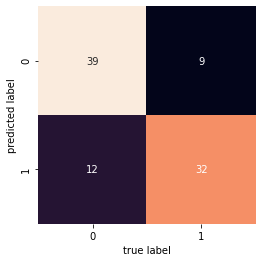

In [16]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

#SVM

In [17]:
from sklearn import svm
train_accuracy = []
val_accuracy = []
avg_train_accuracy = 0
avg_val_accuracy = 0
for i in range(10):
  #Use SVM to predict Cancer
  x = df_final_select
  y = train["Cancer"]
  # y = np.array(y,dtype=int)
  X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

  clf = svm.SVC()
  clf.fit(X_train,y_train)
  y_predict = clf.predict(X_test)
  score_clf = clf.score(X_test,y_test)
  score_clf_train = clf.score(X_train,y_train)
  print("train_accuracy = ",score_clf_train*100," %")
  print("val_accuracy = ",score_clf*100," %")
  train_accuracy.append(score_clf_train)
  val_accuracy.append(score_clf)
  avg_val_accuracy = sum(val_accuracy)/(i+1)
  avg_train_accuracy = sum(train_accuracy)/(i+1)
print('avg_train_accuracy = ',round(avg_train_accuracy,4))
print('avg_val_accuracy = ',round(avg_val_accuracy,4))

train_accuracy =  84.74114441416893  %
val_accuracy =  68.47826086956522  %
train_accuracy =  84.74114441416893  %
val_accuracy =  68.47826086956522  %
train_accuracy =  84.74114441416893  %
val_accuracy =  68.47826086956522  %
train_accuracy =  84.74114441416893  %
val_accuracy =  68.47826086956522  %
train_accuracy =  84.74114441416893  %
val_accuracy =  68.47826086956522  %
train_accuracy =  84.74114441416893  %
val_accuracy =  68.47826086956522  %
train_accuracy =  84.74114441416893  %
val_accuracy =  68.47826086956522  %
train_accuracy =  84.74114441416893  %
val_accuracy =  68.47826086956522  %
train_accuracy =  84.74114441416893  %
val_accuracy =  68.47826086956522  %
train_accuracy =  84.74114441416893  %
val_accuracy =  68.47826086956522  %
avg_train_accuracy =  0.8474
avg_val_accuracy =  0.6848


Text(91.68, 0.5, 'predicted label')

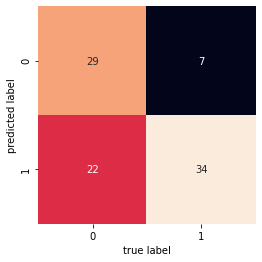

In [18]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

#Neural network MLPClassifier

In [19]:
from sklearn.neural_network import MLPClassifier
train_accuracy = []
val_accuracy = []
avg_train_accuracy = 0
avg_val_accuracy = 0
for i in range(10):
  #Use Neural Network MLPClassifier to predict Cancer
  x = df_final_select
  y = train["Cancer"]
  # y = np.array(y,dtype=int)
  X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

  nnclf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50, 30), random_state=1, max_iter=2000)
  nnclf.fit(X_train,y_train)
  y_predict = nnclf.predict(X_test)
  score_nnclf = nnclf.score(X_test,y_test)
  score_nnclf_train = nnclf.score(X_train,y_train)
  print("train_accuracy = ",score_nnclf_train*100," %")
  print("val_accuracy = ",score_nnclf*100," %")
  train_accuracy.append(score_nnclf_train)
  val_accuracy.append(score_nnclf)
  avg_val_accuracy = sum(val_accuracy)/(i+1)
  avg_train_accuracy = sum(train_accuracy)/(i+1)
print('avg_train_accuracy = ',round(avg_train_accuracy,4))
print('avg_val_accuracy = ',round(avg_val_accuracy,4))

train_accuracy =  100.0  %
val_accuracy =  80.43478260869566  %
train_accuracy =  100.0  %
val_accuracy =  80.43478260869566  %
train_accuracy =  100.0  %
val_accuracy =  80.43478260869566  %
train_accuracy =  100.0  %
val_accuracy =  80.43478260869566  %
train_accuracy =  100.0  %
val_accuracy =  80.43478260869566  %
train_accuracy =  100.0  %
val_accuracy =  80.43478260869566  %
train_accuracy =  100.0  %
val_accuracy =  80.43478260869566  %
train_accuracy =  100.0  %
val_accuracy =  80.43478260869566  %
train_accuracy =  100.0  %
val_accuracy =  80.43478260869566  %
train_accuracy =  100.0  %
val_accuracy =  80.43478260869566  %
avg_train_accuracy =  1.0
avg_val_accuracy =  0.8043


Text(91.68, 0.5, 'predicted label')

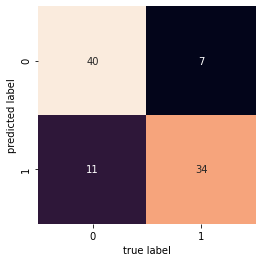

In [20]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

#Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
train_accuracy = []
val_accuracy = []
avg_train_accuracy = 0
avg_val_accuracy = 0
for i in range(10):
  #Use Logistic Regression to predict Cancer
  x = df_final_select
  y = train["Cancer"]
  # y = np.array(y,dtype=int)
  X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

  logclf = LogisticRegression(random_state=0).fit(X_train,y_train)
  y_predict = logclf.predict(X_test)
  score_logclf = logclf.score(X_test,y_test)
  score_logclf_train = logclf.score(X_train,y_train)
  print("train_accuracy = ",score_logclf_train*100," %")
  print("val_accuracy = ",score_logclf*100," %")
  train_accuracy.append(score_logclf_train)
  val_accuracy.append(score_logclf)
  avg_val_accuracy = sum(val_accuracy)/(i+1)
  avg_train_accuracy = sum(train_accuracy)/(i+1)
print('avg_train_accuracy = ',round(avg_train_accuracy,4))
print('avg_val_accuracy = ',round(avg_val_accuracy,4))

train_accuracy =  80.65395095367847  %
val_accuracy =  67.3913043478261  %
train_accuracy =  80.65395095367847  %
val_accuracy =  67.3913043478261  %
train_accuracy =  80.65395095367847  %
val_accuracy =  67.3913043478261  %
train_accuracy =  80.65395095367847  %
val_accuracy =  67.3913043478261  %
train_accuracy =  80.65395095367847  %
val_accuracy =  67.3913043478261  %
train_accuracy =  80.65395095367847  %
val_accuracy =  67.3913043478261  %
train_accuracy =  80.65395095367847  %
val_accuracy =  67.3913043478261  %
train_accuracy =  80.65395095367847  %
val_accuracy =  67.3913043478261  %
train_accuracy =  80.65395095367847  %
val_accuracy =  67.3913043478261  %
train_accuracy =  80.65395095367847  %
val_accuracy =  67.3913043478261  %
avg_train_accuracy =  0.8065
avg_val_accuracy =  0.6739


Text(91.68, 0.5, 'predicted label')

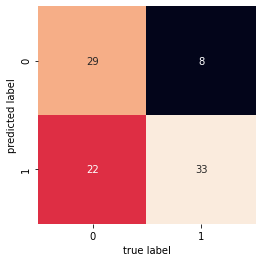

In [22]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

#DNN

In [23]:
import os
import numpy as np
import keras as K
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
os.environ['TF_CPP_MIN_LOG_LEVEL']= '2'

In [24]:
target_var = 'Cancer'
features = list(df_final_select.columns)
# 目標變量的類別
Class = train[target_var].unique()
# 目標變量的類別字典
Class_dict = dict(zip(Class, range(len(Class))))
# 增加一列target, 將目標變量進行編碼
train['target'] = train[target_var].apply(lambda x: Class_dict[x])
# 對目標變量進行0-1編碼(One-hot Encoding)
lb = LabelBinarizer()
lb.fit(list(Class_dict.values()))
transformed_labels = lb.transform(train['target'])
label2 = np.zeros((459,1))

for i in range(len(transformed_labels)):
  if transformed_labels[i][0] == 0:
    label2[i][0] = np.int(1)
  elif transformed_labels[i][0] == 1:
    label2[i][0] = np.int(0)

transformed_labels = np.concatenate((transformed_labels, label2),axis=1)

y_bin_labels = []  # 對多分類進行0-1編碼的變量
for i in range(transformed_labels.shape[1]):
    y_bin_labels.append( 'y' + str(i))
    train['y' + str(i)] = transformed_labels[:, i]
# 將數據集分為訓練集和測試集
train_x, test_x, train_y, test_y = train_test_split(df_final_select[features], train[y_bin_labels], train_size=0.8, test_size=0.2, random_state=0)

In [51]:
np.random.seed(5)
# model
init = K.initializers.glorot_uniform(seed=1)
model = K.models.Sequential()
model.add(K.layers.Dense(units=25, input_dim=2744, kernel_initializer=init, activation='relu'))
model.add(K.layers.Dense(units=2, kernel_initializer=init, activation='relu'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                68625     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 52        
Total params: 68,677
Trainable params: 68,677
Non-trainable params: 0
_________________________________________________________________


In [52]:
# 訓練模型
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
        metrics=['accuracy'])

h = model.fit(train_x, train_y, epochs=30, batch_size=4,
      validation_data=(test_x, test_y))

Epoch 1/30
92/92 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.6322 - val_loss: nan - val_accuracy: 0.6739
Epoch 2/30
92/92 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.7166 - val_loss: nan - val_accuracy: 0.7283
Epoch 3/30
92/92 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.7057 - val_loss: nan - val_accuracy: 0.6848
Epoch 4/30
92/92 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.7629 - val_loss: nan - val_accuracy: 0.7065
Epoch 5/30
92/92 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.7875 - val_loss: nan - val_accuracy: 0.7065
Epoch 6/30
92/92 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.8174 - val_loss: nan - val_accuracy: 0.7065
Epoch 7/30
92/92 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.7875 - val_loss: nan - val_accuracy: 0.7500
Epoch 8/30
92/92 [==============================] - 0s 4ms/ste

|train_accuracy|val_accuracy|
|-----|--------|
|0.8120| 0.7283|  
|0.8828| 0.7283|
|0.5422| 0.5870|
|0.9210| 0.7609|
|0.6131| 0.6522|
|0.5804| 0.6304|
|0.7084| 0.6807|
|0.7834| 0.7605|
|0.6458| 0.6739|
|0.8937| 0.7391|

In [53]:
train_accuracy = [0.8120,0.8828,0.5422,0.9210,0.6131,0.5804,0.7084,0.7384,0.6458,0.8937]
val_accuracy = [0.7283,0.7283,0.5870,0.7609,0.6522,0.6304,0.6087,0.7065,0.6739,0.7391]
print('avg_train_accuracy = ',round(sum(train_accuracy)/10,4))
print('avg_val_accuracy = ',round(sum(val_accuracy)/10,4))

avg_train_accuracy =  0.7338
avg_val_accuracy =  0.6815


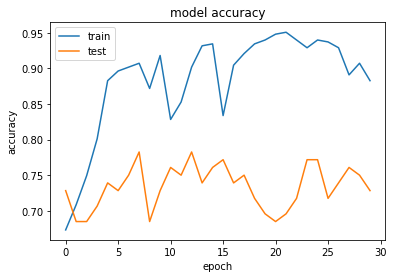

In [31]:
#0.8828/0.7283
# summarize history for accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

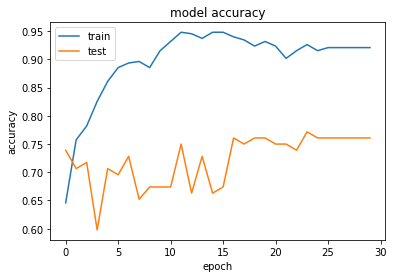

In [36]:
#0.9210/0.7609
# summarize history for accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#PH-CNN
##reference:
###https://github.com/dfioravanti/phylogenetic-cnn
###https://www.tensorflow.org/tutorials/images/cnn

In [54]:
import os
from tensorflow.keras import datasets, layers, models

##Import coordinate data

In [55]:
#reshape
!gdown --id '1vQyQSaE5q3IkEBSYrCsZxHaYwqAGrFM1' --output ordinate.csv
C = pd.read_csv("ordinate.csv")
# Xs = df_final_select.values

Downloading...
From: https://drive.google.com/uc?id=1vQyQSaE5q3IkEBSYrCsZxHaYwqAGrFM1
To: /content/ordinate.csv
100% 1.35M/1.35M [00:00<00:00, 87.1MB/s]


In [56]:
# C = C.drop(shortrun,axis=0)
C.head()

,index,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237
0,SRR6477643,-0.222421,-0.026057,0.206020,0.120651,0.010524,-0.080331,-0.008363,-0.007772,0.070431,0.085478,-0.017817,0.020675,0.018695,0.070112,0.039664,-0.000644,-0.050769,0.000999,0.005669,0.011366,0.075569,0.031816,-0.075881,0.032895,0.034635,0.026160,-0.020453,0.024738,-0.028978,-0.020558,-0.012463,-0.009513,-0.004036,0.005266,-0.045434,0.039241,-0.052855,-0.021016,0.037309,...,-0.003455,-0.009804,-0.003584,-0.004330,-0.002276,0.002684,-0.000196,-0.006767,0.006373,-0.013199,0.007190,0.002428,-0.004455,0.000240,-0.003114,-0.002497,0.001740,0.002806,-0.000431,0.000130,-0.002336,-0.000008,0.003634,-0.002442,0.001690,-0.001093,0.002683,-0.001333,0.001927,-0.000214,0.001903,-0.000758,-0.000219,0.000547,-0.001655,0.001615,0.000410,0.000766,-0.000261,0.000033
1,SRR6477644,0.114309,0.006947,0.179889,0.200024,0.022770,-0.123177,-0.049068,-0.006834,0.062887,-0.031177,-0.010492,-0.050381,0.060308,0.014149,0.000122,-0.026021,0.031827,0.117115,0.013044,0.094489,0.028408,-0.067775,0.007394,-0.043687,0.063385,0.051259,0.003091,0.007464,-0.024631,0.005570,0.018156,0.001430,0.010997,0.016554,0.014099,-0.069298,0.011451,-0.002592,-0.001872,...,-0.006151,-0.003439,0.000568,0.004944,0.000899,0.001471,-0.003106,-0.003316,0.000103,0.005458,0.004120,-0.002371,-0.004092,0.002615,0.004134,-0.003846,0.001846,0.000543,0.004403,-0.000645,0.001632,0.002022,-0.001590,-0.004608,-0.002752,0.001619,-0.000264,-0.001622,0.000164,-0.002871,-0.001420,0.000416,-0.001265,-0.000660,0.001398,0.000413,0.000167,-0.000614,0.000157,-0.000145
2,SRR6477645,-0.097416,-0.158731,0.466359,-0.074263,0.064831,-0.162998,-0.126204,-0.067680,0.051109,0.104758,-0.021174,0.063332,0.037355,0.103703,0.020441,-0.108336,-0.079138,-0.019294,-0.044978,-0.062922,0.019054,0.079016,-0.028522,0.037287,-0.034400,0.048105,0.023456,0.030800,-0.026698,0.060165,0.012812,0.111828,-0.016655,-0.047448,-0.006388,0.030085,0.004388,-0.003017,-0.021125,...,0.004990,0.001506,0.002468,-0.001066,-0.003571,0.006187,0.002494,0.009441,-0.001999,0.008641,-0.000898,0.002015,-0.002637,0.002496,0.003280,0.000571,0.000960,0.004047,-0.001800,-0.000399,-0.002643,-0.000505,-0.000308,-0.001824,-0.004831,0.003183,-0.003225,0.000613,-0.002762,0.000568,0.000940,0.000972,0.000866,0.000664,0.000245,-0.001923,-0.001514,-0.000872,0.000834,-0.000144
3,SRR6477646,-0.079075,-0.081293,0.258912,0.011983,-0.053779,-0.065469,-0.050907,0.016802,0.083962,-0.008696,-0.058788,0.050168,0.021525,-0.034914,-0.019043,-0.090608,0.040526,0.004655,0.021159,-0.034288,-0.016163,0.028607,0.007739,0.007686,0.058268,-0.005037,-0.000345,0.031971,-0.020321,-0.026813,0.012065,0.001394,-0.011086,-0.004086,0.003408,0.009032,0.006735,0.014166,0.031066,...,-0.004655,-0.003661,0.000840,-0.004762,-0.008307,-0.004451,0.000433,-0.004954,-0.000785,-0.000519,0.005631,0.003860,-0.005017,-0.000103,0.001505,-0.004224,-0.001555,0.003178,-0.001448,0.003111,-0.003806,0.000048,0.003148,-0.001491,-0.001224,0.000741,0.000386,0.000213,0.001259,-0.001555,0.001507,-0.001518,-0.000132,0.001644,0.000343,-0.000926,-0.001602,0.000171,-0.000678,0.000079
4,SRR6477647,-0.136135,-0.277395,0.075723,-0.039270,0.008360,-0.122762,0.108227,-0.024046,-0.041558,0.008346,0.021807,-0.090828,-0.028989,-0.035460,-0.114567,0.098489,-0.031871,0.064787,0.008173,0.002225,0.053863,-0.074382,-0.057030,-0.001788,-0.041827,0.060002,-0.003750,0.014707,0.039726,-0.029567,0.084915,-0.004692,0.028473,-0.005504,-0.031685,-0.024129,-0.016401,0.051490,-0.039772,...,-0.001511,-0.001278,-0.000749,-0.000562,-0.003318,-0.000188,0.001016,-0.002242,-0.009302,0.001540,0.000718,0.000517,-0.000147,-0.001082,0.001076,0.004059,-0.000362,-0.002025,-0.000273,-0.002792,0.004625,-0.000514,0.001013,-0.000807,-0.000839,0.000160,0.000666,0.000735

In [58]:
not_select=['index']
C_final = C.drop(not_select,axis=1)
C_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Columns: 237 entries, 1 to 237
dtypes: float64(237)
memory usage: 850.0 KB


In [59]:
C_final.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237
0,-0.222421,-0.026057,0.206020,0.120651,0.010524,-0.080331,-0.008363,-0.007772,0.070431,0.085478,-0.017817,0.020675,0.018695,0.070112,0.039664,-0.000644,-0.050769,0.000999,0.005669,0.011366,0.075569,0.031816,-0.075881,0.032895,0.034635,0.026160,-0.020453,0.024738,-0.028978,-0.020558,-0.012463,-0.009513,-0.004036,0.005266,-0.045434,0.039241,-0.052855,-0.021016,0.037309,0.077217,...,-0.003455,-0.009804,-0.003584,-0.004330,-0.002276,0.002684,-0.000196,-0.006767,0.006373,-0.013199,0.007190,0.002428,-0.004455,0.000240,-0.003114,-0.002497,0.001740,0.002806,-0.000431,0.000130,-0.002336,-0.000008,0.003634,-0.002442,0.001690,-0.001093,0.002683,-0.001333,0.001927,-0.000214,0.001903,-0.000758,-0.000219,0.000547,-0.001655,0.001615,0.000410,0.000766,-0.000261,0.000033
1,0.114309,0.006947,0.179889,0.200024,0.022770,-0.123177,-0.049068,-0.006834,0.062887,-0.031177,-0.010492,-0.050381,0.060308,0.014149,0.000122,-0.026021,0.031827,0.117115,0.013044,0.094489,0.028408,-0.067775,0.007394,-0.043687,0.063385,0.051259,0.003091,0.007464,-0.024631,0.005570,0.018156,0.001430,0.010997,0.016554,0.014099,-0.069298,0.011451,-0.002592,-0.001872,-0.055911,...,-0.006151,-0.003439,0.000568,0.004944,0.000899,0.001471,-0.003106,-0.003316,0.000103,0.005458,0.004120,-0.002371,-0.004092,0.002615,0.004134,-0.003846,0.001846,0.000543,0.004403,-0.000645,0.001632,0.002022,-0.001590,-0.004608,-0.002752,0.001619,-0.000264,-0.001622,0.000164,-0.002871,-0.001420,0.000416,-0.001265,-0.000660,0.001398,0.000413,0.000167,-0.000614,0.000157,-0.000145
2,-0.097416,-0.158731,0.466359,-0.074263,0.064831,-0.162998,-0.126204,-0.067680,0.051109,0.104758,-0.021174,0.063332,0.037355,0.103703,0.020441,-0.108336,-0.079138,-0.019294,-0.044978,-0.062922,0.019054,0.079016,-0.028522,0.037287,-0.034400,0.048105,0.023456,0.030800,-0.026698,0.060165,0.012812,0.111828,-0.016655,-0.047448,-0.006388,0.030085,0.004388,-0.003017,-0.021125,-0.022635,...,0.004990,0.001506,0.002468,-0.001066,-0.003571,0.006187,0.002494,0.009441,-0.001999,0.008641,-0.000898,0.002015,-0.002637,0.002496,0.003280,0.000571,0.000960,0.004047,-0.001800,-0.000399,-0.002643,-0.000505,-0.000308,-0.001824,-0.004831,0.003183,-0.003225,0.000613,-0.002762,0.000568,0.000940,0.000972,0.000866,0.000664,0.000245,-0.001923,-0.001514,-0.000872,0.000834,-0.000144
3,-0.079075,-0.081293,0.258912,0.011983,-0.053779,-0.065469,-0.050907,0.016802,0.083962,-0.008696,-0.058788,0.050168,0.021525,-0.034914,-0.019043,-0.090608,0.040526,0.004655,0.021159,-0.034288,-0.016163,0.028607,0.007739,0.007686,0.058268,-0.005037,-0.000345,0.031971,-0.020321,-0.026813,0.012065,0.001394,-0.011086,-0.004086,0.003408,0.009032,0.006735,0.014166,0.031066,-0.002138,...,-0.004655,-0.003661,0.000840,-0.004762,-0.008307,-0.004451,0.000433,-0.004954,-0.000785,-0.000519,0.005631,0.003860,-0.005017,-0.000103,0.001505,-0.004224,-0.001555,0.003178,-0.001448,0.003111,-0.003806,0.000048,0.003148,-0.001491,-0.001224,0.000741,0.000386,0.000213,0.001259,-0.001555,0.001507,-0.001518,-0.000132,0.001644,0.000343,-0.000926,-0.001602,0.000171,-0.000678,0.000079
4,-0.136135,-0.277395,0.075723,-0.039270,0.008360,-0.122762,0.108227,-0.024046,-0.041558,0.008346,0.021807,-0.090828,-0.028989,-0.035460,-0.114567,0.098489,-0.031871,0.064787,0.008173,0.002225,0.053863,-0.074382,-0.057030,-0.001788,-0.041827,0.060002,-0.003750,0.014707,0.039726,-0.029567,0.084915,-0.004692,0.028473,-0.005504,-0.031685,-0.024129,-0.016401,0.051490,-0.039772,0.022388,...,-0.001511,-0.001278,-0.000749,-0.000562,-0.003318,-0.000188,0.001016,-0.002242,-0.009302,0.001540,0.000718,0.000517,-0.000147,-0.001082,0.001076,0.004059,-0.000362,-0.002025,-0.000273,-0.002792,0.004625,-0.000514,0.001013,-0.000807,-0.000839,0.000160,0.000666,0.000735,0.001589,

In [60]:
X_final = pd.concat([df_final_select, C_final], axis=1)
X_final.shape

(459, 2981)

In [62]:
target_var = 'Cancer'
features = list(X_final.columns)
# 目標變量的類別
Class = train[target_var].unique()
# 目標變量的類別字典
Class_dict = dict(zip(Class, range(len(Class))))
# 增加一列target, 將目標變量進行編碼
train['target'] = train[target_var].apply(lambda x: Class_dict[x])
# 對目標變量進行0-1編碼(One-hot Encoding)
lb = LabelBinarizer()
lb.fit(list(Class_dict.values()))
transformed_labels = lb.transform(train['target'])
label2 = np.zeros((459,1))

for i in range(len(transformed_labels)):
  if transformed_labels[i][0] == 0:
    label2[i][0] = np.int(1)
  elif transformed_labels[i][0] == 1:
    label2[i][0] = np.int(0)

transformed_labels = np.concatenate((transformed_labels, label2),axis=1)

y_bin_labels = []  # 對多分類進行0-1編碼的變量
for i in range(transformed_labels.shape[1]):
    y_bin_labels.append( 'y' + str(i))
    train['y' + str(i)] = transformed_labels[:, i]
# 將數據集分為訓練集和測試集
train_x, test_x, train_y, test_y = train_test_split(X_final[features], train[y_bin_labels], train_size=0.8, test_size=0.2, random_state=0)

In [63]:
print(train_x.shape)
print(test_x.shape)

(367, 2981)
(92, 2981)


In [64]:
train_x = train_x.values.reshape(367, 1, 11, 271)
train_x = train_x.reshape(367, 1, 11, 271)
test_x = test_x.values.reshape(92, 1, 11, 271)
test_x = test_x.reshape(92, 1, 11, 271)

## Model

In [86]:
model = K.models.Sequential()
model.add(K.layers.Conv2D(271, (1, 1), activation='relu', input_shape=train_x.shape[1:]))
model.add(K.layers.Conv2D(50, (1, 1), activation='relu', input_shape=train_x.shape[1:]))
# model.add(K.layers.MaxPooling2D((2, 2)))
model.add(K.layers.Flatten())
model.add(K.layers.Dense(32, activation= 'relu'))
model.add(K.layers.Dropout(0.15))
model.add(K.layers.Dense(2,activation='sigmoid'))

In [67]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 1, 11, 271)        73712     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 11, 50)         13600     
_________________________________________________________________
flatten (Flatten)            (None, 550)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                17632     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 66        
Total params: 105,010
Trainable params: 105,010
Non-trainable params: 0
_______________________________________________

In [87]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
# opt = K.optimizers.Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
        metrics=['accuracy'])

h2 = model.fit(train_x, train_y, epochs=50, batch_size=4,
      validation_data=(test_x, test_y))

Epoch 1/50
92/92 [==============================] - 1s 7ms/step - loss: 0.6795 - accuracy: 0.5967 - val_loss: 0.6666 - val_accuracy: 0.6630
Epoch 2/50
92/92 [==============================] - 1s 6ms/step - loss: 0.5875 - accuracy: 0.7411 - val_loss: 0.5518 - val_accuracy: 0.7065
Epoch 3/50
92/92 [==============================] - 0s 5ms/step - loss: 0.4059 - accuracy: 0.8529 - val_loss: 0.4803 - val_accuracy: 0.7283
Epoch 4/50
92/92 [==============================] - 1s 6ms/step - loss: 0.3037 - accuracy: 0.8719 - val_loss: 0.4898 - val_accuracy: 0.7500
Epoch 5/50
92/92 [==============================] - 1s 5ms/step - loss: 0.2065 - accuracy: 0.9292 - val_loss: 0.5053 - val_accuracy: 0.7609
Epoch 6/50
92/92 [==============================] - 0s 5ms/step - loss: 0.1231 - accuracy: 0.9646 - val_loss: 0.5304 - val_accuracy: 0.8043
Epoch 7/50
92/92 [==============================] - 1s 6ms/step - loss: 0.0725 - accuracy: 0.9809 - val_loss: 0.5993 - val_accuracy: 0.7717
Epoch 8/50
92/92 [==

|train_accuracy|val_accuracy|
|-----|--------|
|0.6531| 0.6000|  
|0.6327| 0.6400|
|0.5510| 0.4400|
|0.6531| 0.6400|
|0.6837| 0.7200|
|0.6939| 0.7600|
|0.6735| 0.6800|
|0.7857| 0.8000|
|0.5816| 0.7200|
|0.6837| 0.6400|

In [88]:
train_accuracy = [1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000]
val_accuracy = [0.7717,0.7826,0.7717,0.7935,0.7935,0.7600,0.8043,0.8043,0.7826,0.8043]
print('avg_train_accuracy = ',round(sum(train_accuracy)/10,4))
print('avg_val_accuracy = ',round(sum(val_accuracy)/10,4))

avg_train_accuracy =  1.0
avg_val_accuracy =  0.7868


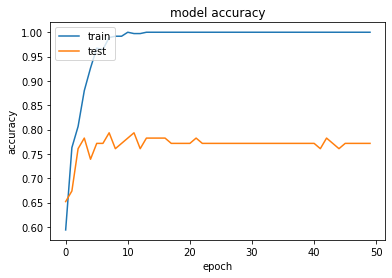

In [69]:
#1/0.7717
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

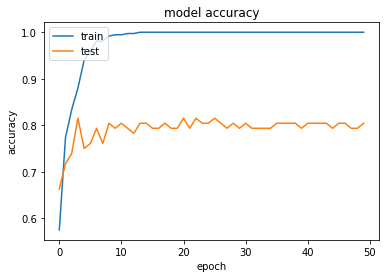

In [81]:
#1/0.8043
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#GCN

In [89]:
import os
import numpy as np
import keras as K
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
os.environ['TF_CPP_MIN_LOG_LEVEL']= '2'

In [90]:
!gdown --id '1RHgF1L4HtxJlgU4J0M-rzpVRFd82Tb5d' --output A.csv
!gdown --id '11hMBnq1v1eynV29AAVBlLnMEYmeJC9A4' --output D.csv
A = pd.read_csv("A.csv",header=None)
D = pd.read_csv("D.csv",header=None)

Downloading...
From: https://drive.google.com/uc?id=1RHgF1L4HtxJlgU4J0M-rzpVRFd82Tb5d
To: /content/A.csv
2.50MB [00:00, 79.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=11hMBnq1v1eynV29AAVBlLnMEYmeJC9A4
To: /content/D.csv
100% 422k/422k [00:00<00:00, 60.4MB/s]


In [91]:
train = pd.read_csv("level-6.csv")
train.head()

,index,Archaea;Aenigmarchaeota;Candidatus.Aenigmarchaeum;;__;__,Archaea;Bacteria.Outgroup;;__;__;__,Archaea;Diapherotrites;Diapherotrites.Incertae.Sedis.AR10;;__;__,Archaea;Euryarchaeota;Halobacteria;Haloferacales;Haloferacaceae;Halorubrum,Archaea;Euryarchaeota;Methanobacteria;Methanobacteriales;Methanobacteriaceae;Methanobrevibacter,Archaea;Euryarchaeota;Methanomicrobia;Methanomicrobiales;Methanospirillaceae;Methanospirillum,Archaea;Euryarchaeota;Methanomicrobia;Methanosarcinales;Methanosarcinaceae;Methanococcoides,Archaea;Euryarchaeota;Methanomicrobia;Methanosarcinales;Methanosarcinaceae;Methanosarcina,Archaea;Euryarchaeota;Methanomicrobia;Methanosarcinales;Methanosarcinaceae;__,Archaea;Euryarchaeota;Methanomicrobia;Methanosarcinales;__;__,Archaea;Euryarchaeota;__;__;__;__,Archaea;Thermoplasmatota;Thermoplasmata;Marine_Group_II;metagenome;,Archaea;Thermoplasmatota;Thermoplasmata;Marine_Group_II;uncultured_bacterium;,Archaea;__;__;__;__;__,Bacteria;AD3;PAC000071;PAC001878;PAC001878;PAC001878,Bacteria;AF234118;EU132452;EU132452;EU132452;HM186358,Bacteria;Abditibacteriota;Abditibacteria;Abditibacteriales;Abditibacteriaceae;Abditibacterium,Bacteria;Acidobacteria;Acidobacteria_Gp6;Gp6;;__,Bacteria;Acidobacteria;Acidobacteriia;Acidobacteriales;Acidobacteriaceae;PAC002018,Bacteria;Acidobacteria;Blastocatellia;Blastocatellales;Blastocatellaceae;Stenotrophobacter,Bacteria;Acidobacteria;Blastocatellia;Blastocatellales;PAC000004;PAC001850,Bacteria;Acidobacteria;Blastocatellia;Blastocatellales;PAC000004;PAC002591,Bacteria;Acidobacteria;CP011806;CP011806;CP011806;CP011806,Bacteria;Acidobacteria;PAC001813;PAC001813;PAC001813;PAC001813,Bacteria;Acidobacteria;PAC001852;PAC001852;PAC001852;PAC001852,Bacteria;Acidobacteria;PAC002261;PAC002261;PAC002261;PAC002261,Bacteria;Acidobacteria;Solibacteres;PAC000121;HM187196;HM187196,Bacteria;Acidobacteria;Solibacteres;PAC000121;PAC000121;PAC000030,Bacteria;Acidobacteria;Solibacteres;PAC000121;PAC000121;PAC000046,Bacteria;Acidobacteria;Solibacteres;Solibacterales;Bryobacteraceae;PAC002019,Bacteria;Acidobacteria;Solibacteres;Solibacterales;Solibacteraceae;Solibacter,Bacteria;Acidobacteria;Solibacteres;Solibacterales;__;__,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;PAC002281;PAC002281,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;DQ787713,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;DQ829632,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;GU187031,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;PAC001869,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;PAC001874,Bacteria;Acidobacteria;Vicinamibacter;Vicinamibacter;Vicinamibacter;Vicinamibacter,...,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Opitutales;Puniceicoccaceae;uncultured,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;ADurb.Bin063-1,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;DEV008,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;DEV114,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;Ellin516,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;Ellin517,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;__,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;uncultured,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;uncultured_bacterium,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Pedosphaerales;Pedosphaeraceae;uncultured_subdivision_,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Akkermansiaceae;Akkermansia,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Rubritaleaceae;Luteolibacter,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Verrucomicrobiaceae;Brevifollis,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Verrucomicrobiaceae;Prosthecobacter,Bacteria;Verrucomicrobiota;

In [92]:
A = A.to_numpy()
D = D.to_numpy()
# df_final_select = df_final_select.to_numpy()

In [93]:
print(A)

[[0.         0.50206778 0.50900198 ... 1.05024838 0.62424268 0.60003111]
 [0.50206778 0.         0.62745031 ... 1.05058206 0.53253543 0.49285228]
 [0.50900198 0.62745031 0.         ... 1.15543202 0.8019616  0.76581082]
 ...
 [1.05024838 1.05058206 1.15543202 ... 0.         0.78788919 0.80149666]
 [0.62424268 0.53253543 0.8019616  ... 0.78788919 0.         0.28230272]
 [0.60003111 0.49285228 0.76581082 ... 0.80149666 0.28230272 0.        ]]


In [94]:
print(D)

[[ 76   0   0 ...   0   0   0]
 [  0  51   0 ...   0   0   0]
 [  0   0 114 ...   0   0   0]
 ...
 [  0   0   0 ...  20   0   0]
 [  0   0   0 ...   0  65   0]
 [  0   0   0 ...   0   0  62]]


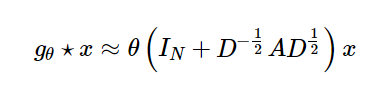

In [96]:
x = df_final_select.to_numpy()
I = np.eye(459)
g_theta = np.matmul((I + ((D**0.5)*A*(D**0.5))),x)
print(g_theta)

[[0.         0.         0.         ... 0.03776964 0.         0.00512821]
 [0.         0.         0.         ... 0.05188857 0.         0.        ]
 [0.         0.         0.         ... 0.01797472 0.         0.00033643]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00131317 0.         0.        ]
 [0.         0.         0.         ... 0.00357634 0.         0.        ]]


In [97]:
target_var = 'Cancer'
features = list(df_final_select.columns)
# 目標變量的類別
Class = train[target_var].unique()
# 目標變量的類別字典
Class_dict = dict(zip(Class, range(len(Class))))
# 增加一列target, 將目標變量進行編碼
train['target'] = train[target_var].apply(lambda x: Class_dict[x])
# 對目標變量進行0-1編碼(One-hot Encoding)
lb = LabelBinarizer()
lb.fit(list(Class_dict.values()))
transformed_labels = lb.transform(train['target'])
label2 = np.zeros((459,1))

for i in range(len(transformed_labels)):
  if transformed_labels[i][0] == 0:
    label2[i][0] = np.int(1)
  elif transformed_labels[i][0] == 1:
    label2[i][0] = np.int(0)

transformed_labels = np.concatenate((transformed_labels, label2),axis=1)
y_bin_labels = []  # 對多分類進行0-1編碼的變量
for i in range(transformed_labels.shape[1]):
    y_bin_labels.append( 'y' + str(i))
    train['y' + str(i)] = transformed_labels[:, i]
# 將數據集分為訓練集和測試集
train_x, test_x, train_y, test_y = train_test_split(g_theta, train[y_bin_labels], train_size=0.8, test_size=0.2, random_state=0)

In [98]:
train_x.shape

(367, 2744)

In [99]:
train_x = train_x.reshape(367, 8, 7, 49)
test_x = test_x.reshape(92, 8, 7, 49)

## Model

In [128]:
model = K.models.Sequential()
model.add(K.layers.Conv2D(49, (3, 3), activation='relu', input_shape=train_x.shape[1:]))
# model.add(K.layers.Conv2D(30, (1, 1), input_shape=train_x.shape[1:]))
model.add(K.layers.Flatten())
model.add(K.layers.Dense(32, activation= 'relu'))
model.add(K.layers.Dropout(0.15))
model.add(K.layers.Dense(2,activation='sigmoid'))

In [108]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 12, 12, 49)        6223      
_________________________________________________________________
flatten_11 (Flatten)         (None, 7056)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 32)                225824    
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 66        
Total params: 232,113
Trainable params: 232,113
Non-trainable params: 0
_________________________________________________________________


In [129]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00002)
# opt = K.optimizers.Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
        metrics=['accuracy'])

h2 = model.fit(train_x, train_y, epochs=50, batch_size=4,
      validation_data=(test_x, test_y))

Epoch 1/50
92/92 [==============================] - 1s 6ms/step - loss: 0.6923 - accuracy: 0.5504 - val_loss: 0.6921 - val_accuracy: 0.6522
Epoch 2/50
92/92 [==============================] - 0s 5ms/step - loss: 0.6893 - accuracy: 0.7302 - val_loss: 0.6903 - val_accuracy: 0.6630
Epoch 3/50
92/92 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.7548 - val_loss: 0.6877 - val_accuracy: 0.6522
Epoch 4/50
92/92 [==============================] - 0s 4ms/step - loss: 0.6809 - accuracy: 0.7384 - val_loss: 0.6851 - val_accuracy: 0.6739
Epoch 5/50
92/92 [==============================] - 0s 4ms/step - loss: 0.6750 - accuracy: 0.7684 - val_loss: 0.6809 - val_accuracy: 0.6413
Epoch 6/50
92/92 [==============================] - 0s 5ms/step - loss: 0.6688 - accuracy: 0.7875 - val_loss: 0.6792 - val_accuracy: 0.6630
Epoch 7/50
92/92 [==============================] - 0s 4ms/step - loss: 0.6631 - accuracy: 0.7793 - val_loss: 0.6765 - val_accuracy: 0.6630
Epoch 8/50
92/92 [==

|train_accuracy|val_accuracy|
|-----|--------|
|0.8065| 0.7065|  
|0.8065| 0.7065|
|0.7783| 0.6957|
|0.8147| 0.7065|
|0.7902| 0.6957|
|0.8147| 0.7065|
|0.8038| 0.6848|
|0.8120| 0.7065|
|0.8065| 0.6957|
|0.8556| 0.6957|

In [131]:
train_accuracy = [0.8065,0.8065,0.7793,0.8147,0.7902,0.8147,0.8038,0.8120,0.8065,0.8556]
val_accuracy = [0.7065,0.7065,0.6957,0.7065,0.6957,0.7065,0.6848,0.7065,0.6957,0.6957]
print('avg_train_accuracy = ',round(sum(train_accuracy)/10,4))
print('avg_val_accuracy = ',round(sum(val_accuracy)/10,4))

avg_train_accuracy =  0.809
avg_val_accuracy =  0.7


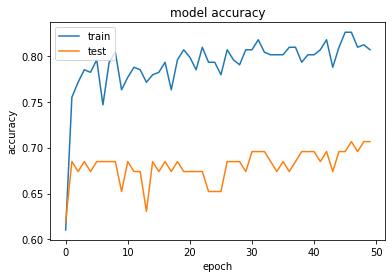

In [112]:
#0.8065/0.7065
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

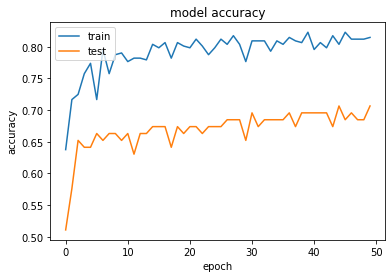

In [117]:
#0.8147/0.7065
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()